<a href="https://colab.research.google.com/github/Shinigami-Developer/NLP-Natural-Language-Processing-Projects/blob/main/Sentiment%20Analysis%20-%20Restaurant%20Reviews/Sentiment_Analysis_Restaurant_Reviews_Sentiment_Analysis_of_Restaurant_Reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing essential libraries
import numpy as np
import pandas as pd

In [3]:
# Loading the dataset
df = pd.read_csv('/content/Restaurant_Reviews.tsv', delimiter='\t', quoting=3)

In [4]:
df.shape

(1000, 2)

In [5]:
df.columns

Index(['Review', 'Liked'], dtype='object')

In [6]:
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


**Data Preprocessing**

In [7]:
# Importing essential libraries for performing Natural Language Processing on 'Restaurant_Reviews.tsv' dataset

import nltk
import re
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [8]:
# Cleaning the reviews

corpus = []

for i in range(0,1000):

  # Cleaning special character from the reviews
  review = re.sub(pattern='[^a-zA-Z]',repl=' ', string=df['Review'][i])

  # Converting the entire review into lower case
  review = review.lower()

  # Tokenizing the review by words
  review_words = review.split()

  # Removing the stop words
  review_words = [word for word in review_words if not word in set(stopwords.words('english'))]

  # Stemming the words
  ps = PorterStemmer()
  review = [ps.stem(word) for word in review_words]

  # Joining the stemmed words
  review = ' '.join(review)

  # Creating a corpus
  corpus.append(review)

In [9]:
corpus[0:10]

['wow love place',
 'crust good',
 'tasti textur nasti',
 'stop late may bank holiday rick steve recommend love',
 'select menu great price',
 'get angri want damn pho',
 'honeslti tast fresh',
 'potato like rubber could tell made ahead time kept warmer',
 'fri great',
 'great touch']

In [10]:
# Creating the Bag of Words model

from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features=1500)
X = cv.fit_transform(corpus).toarray()
y = df.iloc[:, 1].values

**Model Building**

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [12]:
# Fitting Naive Bayes to the Training set

from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [13]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [14]:
# Accuracy, Precision and Recall

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

score1 = accuracy_score(y_test,y_pred)
score2 = precision_score(y_test,y_pred)
score3= recall_score(y_test,y_pred)

print("---- Scores ----")
print("Accuracy score is: {}%".format(round(score1*100,2)))
print("Precision score is: {}".format(round(score2,2)))
print("Recall score is: {}".format(round(score3,2)))

---- Scores ----
Accuracy score is: 76.5%
Precision score is: 0.76
Recall score is: 0.79


In [15]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [16]:
cm

array([[72, 25],
       [22, 81]])

Text(69.0, 0.5, 'Actual values')

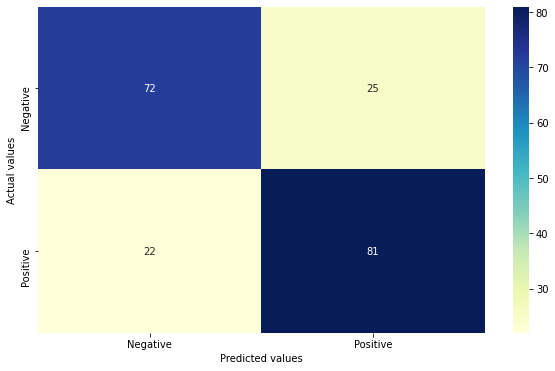

In [17]:
# Plotting the confusion matrix

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize = (10,6))

sns.heatmap(cm, annot=True, cmap="YlGnBu", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])

plt.xlabel('Predicted values')
plt.ylabel('Actual values')


In [18]:
# Hyperparameter tuning the Naive Bayes Classifier

best_accuracy = 0.0
alpha_val = 0.0

for i in np.arange(0.1,1.1,0.1):
  temp_classifier = MultinomialNB(alpha=i)
  temp_classifier.fit(X_train, y_train)
  temp_y_pred = temp_classifier.predict(X_test)
  score = accuracy_score(y_test, temp_y_pred)
  print("Accuracy score for alpha={} is: {}%".format(round(i,1), round(score*100,2)))
  if score>best_accuracy:
    best_accuracy = score
    alpha_val = i
    
print('--------------------------------------------')
print('The best accuracy is {}% with alpha value as {}'.format(round(best_accuracy*100, 2), round(alpha_val,1)))

Accuracy score for alpha=0.1 is: 78.0%
Accuracy score for alpha=0.2 is: 78.5%
Accuracy score for alpha=0.3 is: 78.0%
Accuracy score for alpha=0.4 is: 78.0%
Accuracy score for alpha=0.5 is: 77.5%
Accuracy score for alpha=0.6 is: 77.5%
Accuracy score for alpha=0.7 is: 77.5%
Accuracy score for alpha=0.8 is: 77.0%
Accuracy score for alpha=0.9 is: 76.5%
Accuracy score for alpha=1.0 is: 76.5%
--------------------------------------------
The best accuracy is 78.5% with alpha value as 0.2


In [19]:
classifier = MultinomialNB(alpha=0.2)
classifier.fit(X_train, y_train)

MultinomialNB(alpha=0.2, class_prior=None, fit_prior=True)

**Predictions**

In [20]:
def predict_sentiment(sample_review):
  sample_review = re.sub(pattern='[^a-zA-Z]',repl=' ', string = sample_review)
  sample_review = sample_review.lower()
  sample_review_words = sample_review.split()
  sample_review_words = [word for word in sample_review_words if not word in set(stopwords.words('english'))]
  ps = PorterStemmer()
  final_review = [ps.stem(word) for word in sample_review_words]
  final_review = ' '.join(final_review)

  temp = cv.transform([final_review]).toarray()
  return classifier.predict(temp)


In [21]:
# Predicting values

sample_review = 'The food is really good here.'

if predict_sentiment(sample_review):
  print('This is a POSITIVE review.')
else:
  print('This is a NEGATIVE review!')

This is a POSITIVE review.


In [22]:
# Predicting values
sample_review = 'Food was pretty bad and the service was very slow.'

if predict_sentiment(sample_review):
  print('This is a POSITIVE review.')
else:
  print('This is a NEGATIVE review!')

This is a NEGATIVE review!


In [23]:
# Predicting values

sample_review = 'The food was absolutely wonderful, from preparation to presentation, very pleasing.'

if predict_sentiment(sample_review):
  print('This is a POSITIVE review.')
else:
  print('This is a NEGATIVE review!')

This is a POSITIVE review.
